In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
fulfilment_center_info = pd.read_csv('fulfilment_center_info.csv')
meal_info = pd.read_csv('meal_info.csv')


In [216]:
train.shape

(456548, 9)

In [217]:
test.shape

(32573, 8)

In [218]:
fulfilment_center_info.shape

(77, 5)

In [219]:
meal_info.shape

(51, 3)

In [220]:
merged_data = pd.merge(fulfilment_center_info, meal_info, how='cross')

In [221]:
train_all = pd.merge(train,merged_data,how="left")

In [222]:
train_all.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [223]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [224]:
train_all.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


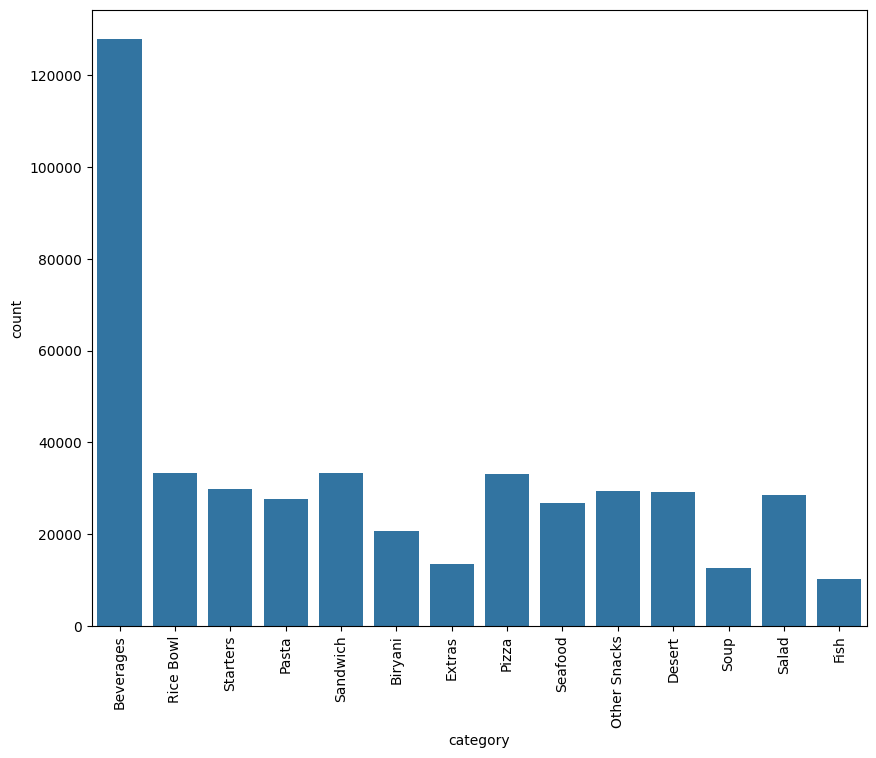

In [225]:
plt.figure(figsize = (10,8))
sns.countplot(data = train, x= train_all.category)
plt.xticks(rotation = 90)
plt.show()

### Perform Standardization on checkout_priceand, base_price

In [226]:
# from sklearn.preprocessing import StandardScaler

In [227]:
# ss = StandardScaler()

In [228]:
# ss.fit(train_all[["checkout_price"]])

In [229]:
# train_all["checkout_price_ss"] = pd.DataFrame(ss.transform(train_all[["checkout_price"]]), columns=["x"] )

In [230]:
# train_all.head()

### Normalization

In [231]:
from sklearn.preprocessing import MinMaxScaler

In [232]:
ms = MinMaxScaler()

In [233]:
ms.fit(train_all[["base_price", "checkout_price"]])

MinMaxScaler()

In [234]:
ms.fit(test[["base_price", "checkout_price"]])

MinMaxScaler()

In [235]:
train_all[["base_price_scaled", "checkout_price_scaled"]] = ms.transform(train_all[["base_price", "checkout_price"]])


In [236]:
test[["base_price_scaled", "checkout_price_scaled"]] = ms.transform(test[["base_price", "checkout_price"]])

In [237]:
train_all.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,base_price_scaled,checkout_price_scaled
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,0.061610,0.065916
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,0.045526,0.065916
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,0.045555,0.064032
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,0.340333,0.259725
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,0.149759,0.167923


In [238]:
train_all.drop(columns=["id","checkout_price","base_price","emailer_for_promotion","homepage_featured","city_code","region_code","center_type","op_area","category","cuisine"], inplace=True)


In [239]:
train_all.dropna(inplace=True)

In [240]:
train_all.head()

,week,center_id,meal_id,num_orders,base_price_scaled,checkout_price_scaled
0,1,55,1885,177,0.061610,0.065916
1,1,55,1993,270,0.045526,0.065916
2,1,55,2539,189,0.045555,0.064032
3,1,55,2139,54,0.340333,0.259725
4,1,55,2631,40,0.149759,0.167923


In [241]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,base_price_scaled,checkout_price_scaled
0,1028232,146,55,1885,158.11,159.11,0,0,0.068274,0.086266
1,1127204,146,55,1993,160.11,159.11,0,0,0.068274,0.088178
2,1212707,146,55,2539,157.14,159.14,0,0,0.068303,0.085338
3,1082698,146,55,2631,162.02,162.02,0,0,0.071117,0.090005
4,1400926,146,55,1248,163.93,163.93,0,0,0.072984,0.091831


In [242]:
test.drop(columns=["id","checkout_price","base_price","emailer_for_promotion","homepage_featured"], inplace=True)

In [243]:
test.dropna(inplace=True)

In [244]:
test.head()

,week,center_id,meal_id,base_price_scaled,checkout_price_scaled
0,146,55,1885,0.068274,0.086266
1,146,55,1993,0.068274,0.088178
2,146,55,2539,0.068303,0.085338
3,146,55,2631,0.071117,0.090005
4,146,55,1248,0.072984,0.091831


### Handle Categorical Variables

In [314]:
# Identify categorical columns
# categorical_columns = ['center_type', 'category', 'cuisine']

In [ ]:
# Perform one-hot encoding on categorical columns
# df_encoded = pd.get_dummies(train_all, columns=categorical_columns)

### identify correlation

In [247]:
# # Calculate the correlation matrix
# correlation_matrix = df_encoded.corr()

In [248]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(correlation_matrix,cmap='coolwarm',linewidths=1)
# plt.show()

In [249]:
# # plt.figure(figsize=(20,8))
# train.corr()['num_orders'].sort_values(ascending=False).plot(kind='bar')

In [250]:
# df_encoded.head()

###  Feature Importance Analysis

In [251]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

In [252]:
# # Define your features and target
# X = df_encoded.drop('num_orders', axis=1)
# y = df_encoded['num_orders']

In [253]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [254]:
# # Train a Random Forest Regressor
# model = RandomForestRegressor(random_state=42)

In [255]:
# model.fit(X_train, y_train)

In [256]:
# # Extract feature importances
# importances = model.feature_importances_
# features = X.columns

In [257]:
# # Create a DataFrame for visualization
# feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [258]:
# # Visualize feature importances
# plt.figure(figsize=(16, 8))
# sns.barplot(x='importance', y='feature', data=feature_importance_df)
# plt.title('Feature Importance')
# plt.show()

In [259]:
# # Set a threshold
# threshold = 0.05

In [260]:
# # Select features with importance greater than the threshold
# selected_features = feature_importance_df[feature_importance_df['importance'] > threshold]['feature']

In [261]:
# selected_features

In [262]:
# # Create a new dataframe with selected features
# X_selected = df_encoded[selected_features]

In [263]:
# X_selected

In [264]:
# # drop colummn
# X_selected.drop(columns=["checkout_price","homepage_featured","category_Sandwich","category_Rice Bowl",], inplace=True)

In [265]:
# X_selected.head()

In [266]:
train_all.head()

,week,center_id,meal_id,num_orders,base_price_scaled,checkout_price_scaled
0,1,55,1885,177,0.061610,0.065916
1,1,55,1993,270,0.045526,0.065916
2,1,55,2539,189,0.045555,0.064032
3,1,55,2139,54,0.340333,0.259725
4,1,55,2631,40,0.149759,0.167923


In [267]:
test.head()

,week,center_id,meal_id,base_price_scaled,checkout_price_scaled
0,146,55,1885,0.068274,0.086266
1,146,55,1993,0.068274,0.088178
2,146,55,2539,0.068303,0.085338
3,146,55,2631,0.071117,0.090005
4,146,55,1248,0.072984,0.091831


In [268]:
# df_encoded.describe()

In [269]:
# X_selected.isnull().sum()

In [270]:
# train.dropna(inplace=True)

In [271]:
# sns.heatmap(X_selected.isnull())
# plt.show()

In [272]:
# plt.figure(figsize=(20,8))
# X_selected.corr()['num_orders'].sort_values(ascending=False).plot(kind='bar')

In [273]:
# X_selected.head()

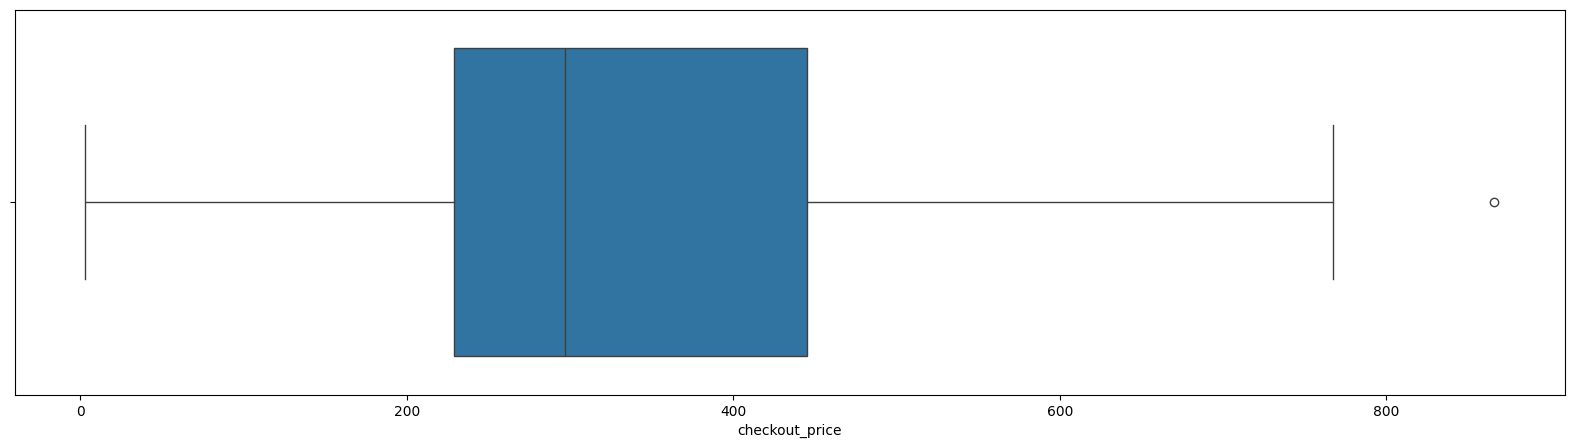

In [274]:
plt.figure(figsize=(20,5))
sns.boxplot(x = "checkout_price",data=train)
plt.show()

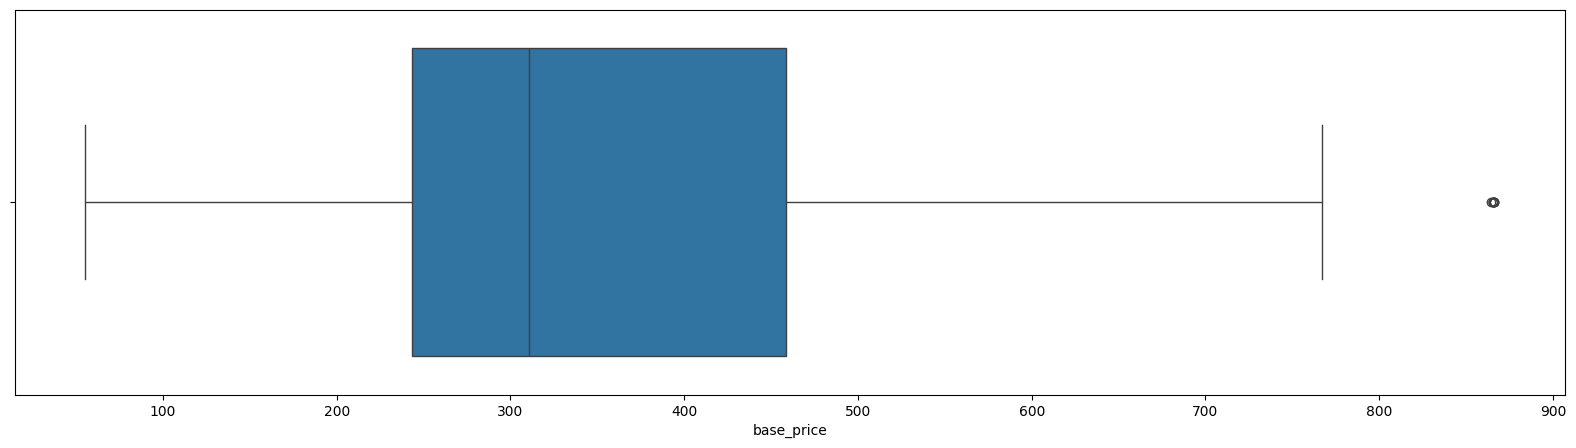

In [275]:
plt.figure(figsize=(20,5))
sns.boxplot(x = "base_price",data=train)
plt.show()

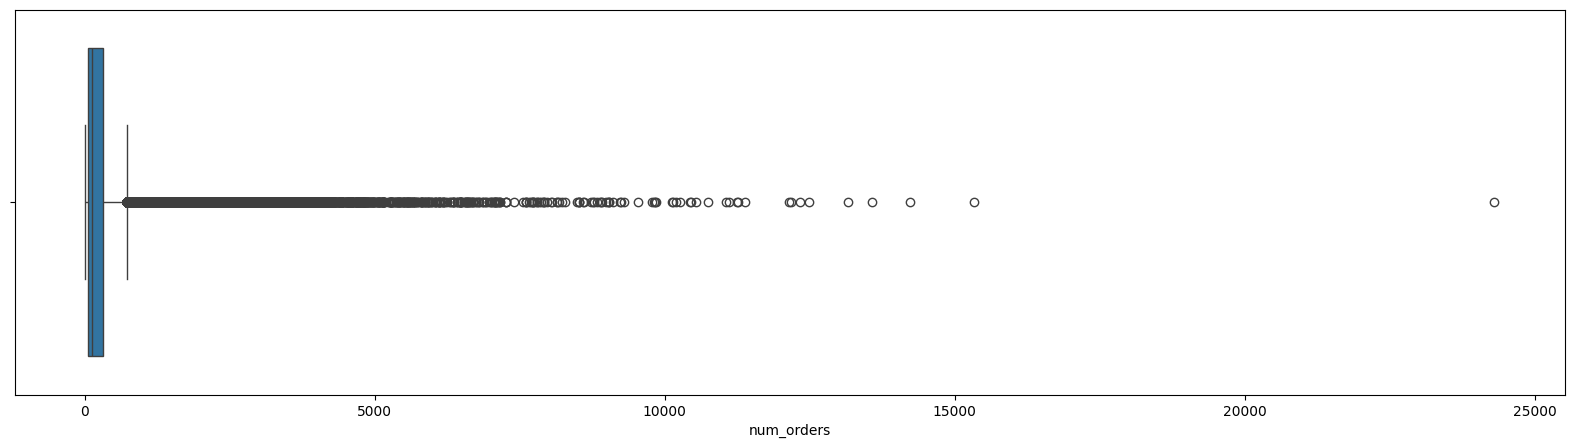

In [276]:
plt.figure(figsize=(20,5))
sns.boxplot(x = "num_orders",data=train)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1020\564086326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["num_orders"])


<Axes: xlabel='num_orders', ylabel='Density'>

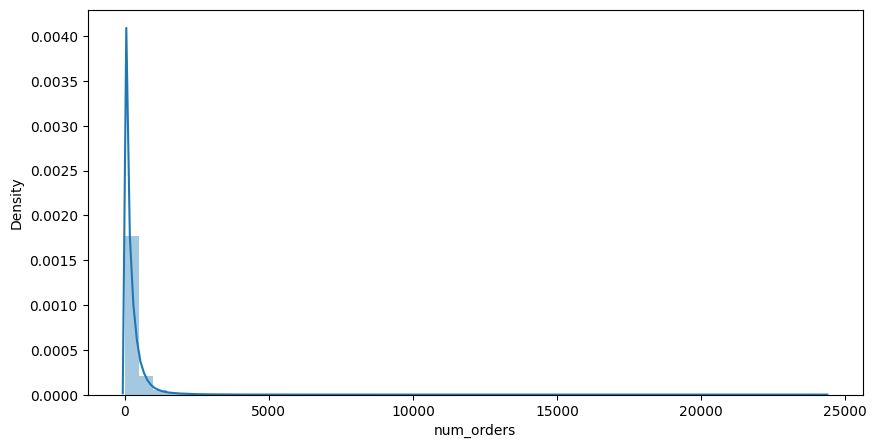

In [277]:
plt.figure(figsize=(10,5))
# plt.xlim(0,1500)
sns.distplot(train["num_orders"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_1020\1950795140.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["num_orders"])


<Axes: xlabel='num_orders', ylabel='Density'>

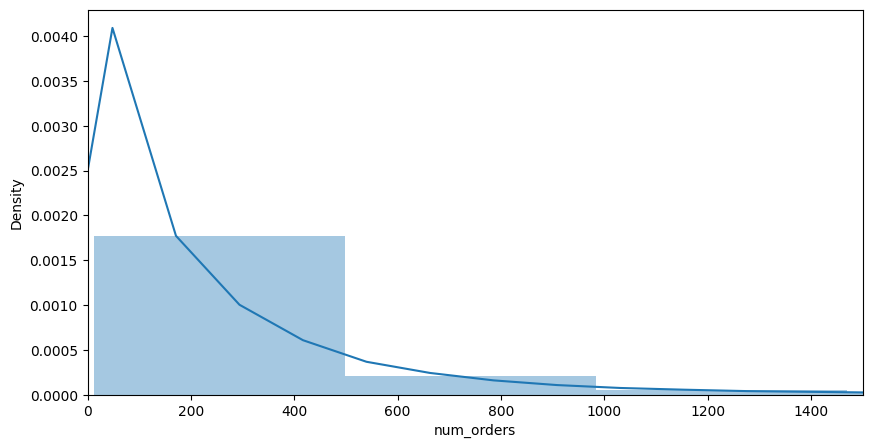

In [278]:
plt.figure(figsize=(10,5))
plt.xlim(0,1500)
sns.distplot(train["num_orders"])


In [279]:
# removing outliers using IQR method
q1 = train["num_orders"].quantile(0.25)
q3 = train["num_orders"].quantile(0.75)
iqr = q3 - q1

In [280]:
min_r = q1 - (1.5 * iqr)
max_r = q3 + (1.5 * iqr)
min_r,max_r

(-351.0, 729.0)

In [281]:
train.shape

(456548, 9)

In [282]:
X_selected = train[train["num_orders"] <= max_r]

In [283]:
X_selected.shape

(423611, 9)

In [284]:
X_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
id,423611.0,1.250083e+06,144347.684158,1000000.00,1125011.50,1250094.00,1375125.50,1499999.00
week,423611.0,7.490568e+01,41.588333,1.00,39.00,76.00,111.00,145.00
center_id,423611.0,8.287122e+01,45.809735,10.00,50.00,77.00,110.00,186.00
meal_id,423611.0,2.023712e+03,550.908603,1062.00,1543.00,1993.00,2569.00,2956.00
checkout_price,423611.0,3.407117e+02,153.820216,2.97,241.53,309.43,446.23,866.27
base_price,423611.0,3.611467e+02,161.282933,55.35,244.50,317.22,470.51,866.27
emailer_for_promotion,423611.0,6.534769e-02,0.247139,0.00,0.00,0.00,0.00,1.00
homepage_featured,423611.0,8.784474e-02,0.283069,0.00,0.00,0.00,0.00,1.00
num_orders,423611.0,1.822030e+02,169.519085,13.00,53.00,122.00,270.00,729.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_1020\3745191006.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["num_orders"])


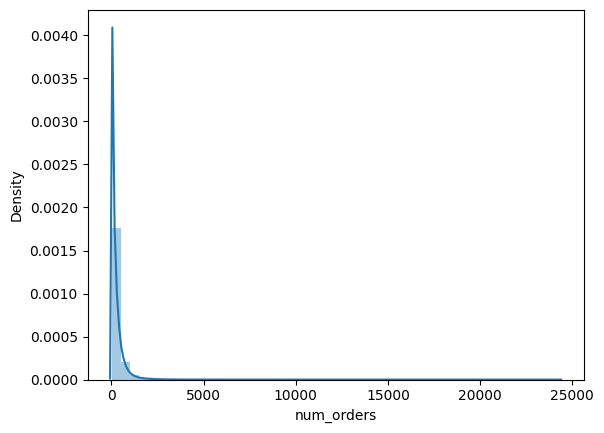

In [285]:
sns.distplot(train["num_orders"])
plt.show()

In [286]:
# from sklearn.preprocessing import FunctionTransformer

In [287]:
# ft = FunctionTransformer(func=np.log1p)

In [288]:
# ft.fit(train[["num_orders"]])

In [289]:
# train["num_orders_tf"] = ft.transform(train[["num_orders"]])

In [290]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# sns.distplot(train["num_orders"])
# plt.title("Before")

# plt.subplot(1,2,2)
# sns.distplot(train["num_orders_tf"])
# plt.title("After")

# plt.show()

In [291]:
# X_selected

In [292]:
# # Separate features and target variable
# X_train = X_selected.drop(columns=['num_orders'])
# y_train = X_selected['num_orders']


In [293]:
# X_selected.describe()

In [294]:
# Features for test data (since there's no num_orders column)
# X_test = test

In [295]:
# X_selected.shape

In [296]:
# X_selected.isnull().sum()

In [297]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [298]:
# Assuming 'num_orders' is the target variable
X = train_all.drop(columns=['num_orders'])  # Features
y = train_all['num_orders']  # Target variable

In [299]:
# Split data into training and test sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected  = train_test_split(X, y, test_size=0.2, random_state=42)

In [300]:
model = RandomForestRegressor(random_state=42)

In [301]:
train_all.head()

,week,center_id,meal_id,num_orders,base_price_scaled,checkout_price_scaled
0,1,55,1885,177,0.061610,0.065916
1,1,55,1993,270,0.045526,0.065916
2,1,55,2539,189,0.045555,0.064032
3,1,55,2139,54,0.340333,0.259725
4,1,55,2631,40,0.149759,0.167923


In [302]:
train_all.shape

(456548, 6)

In [303]:
test.head()

,week,center_id,meal_id,base_price_scaled,checkout_price_scaled
0,146,55,1885,0.068274,0.086266
1,146,55,1993,0.068274,0.088178
2,146,55,2539,0.068303,0.085338
3,146,55,2631,0.071117,0.090005
4,146,55,1248,0.072984,0.091831


In [304]:
test.shape

(32573, 5)

In [305]:
# Example: Check column names
print(train_all.columns)
print(test.columns)

Index(['week', 'center_id', 'meal_id', 'num_orders', 'base_price_scaled',
       'checkout_price_scaled'],
      dtype='object')
Index(['week', 'center_id', 'meal_id', 'base_price_scaled',
       'checkout_price_scaled'],
      dtype='object')


In [306]:
model.fit(X_train_selected,y_train_selected)

RandomForestRegressor(random_state=42)

In [307]:
# Predict on test data
y_pred_test = model.predict(test)
y_pred_test

array([121.14,  89.24, 220.54, ..., 319.65, 287.96, 237.16])

In [308]:
test.shape

(32573, 5)

In [309]:
y_pred_test.shape

(32573,)

In [310]:
# Use the score method to evaluate the model on test data
train_score = model.score(X_train_selected, y_train_selected)
test_score = model.score(X_test_selected, y_test_selected)

train_score,test_score

(0.971332357757333, 0.7969171296083739)

In [311]:
print(f"Train R-squared: {train_score:.2f}")
print(f"Test R-squared: {test_score:.2f}")

Train R-squared: 0.97
Test R-squared: 0.80


In [312]:
def predict_num_orders(week, center_id, meal_id, checkout_price, base_price):

    input_data = pd.DataFrame({
        'week': [week],
        'center_id': [center_id],
        'meal_id': [meal_id],
        'checkout_price': [checkout_price],
        'base_price': [base_price]
    })

    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]


In [313]:
# if __name__ == "__main__":
#     week = int(input("Enter week: "))
#     center_id = int(input("Enter center_id: "))
#     meal_id = int(input("Enter meal_id: "))
#     checkout_price = float(input("Enter checkout_price: "))
#     base_price = float(input("Enter base_price: "))

#     predicted_orders = predict_num_orders(week, center_id, meal_id, checkout_price, base_price)
#     print(f"Predicted number of orders: {int(predicted_orders)}")
